# Explore here

In [1]:
# Your code here
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import mstats
from scipy import stats
from scipy.stats import kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv",sep=",")
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
df


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [2]:
df.tail()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6
3139,56045,6967,780,11.195637,779,11.181283,681,9.774652,906,13.004162,...,480,11.7,10.7,12.7,644,3.4,3.1,3.6,185,6


In [3]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


In [4]:
df.nunique()

fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.dtypes

fips                        int64
TOT_POP                     int64
0-9                         int64
0-9 y/o % of total pop    float64
19-Oct                      int64
                           ...   
CKD_prevalence            float64
CKD_Lower 95% CI          float64
CKD_Upper 95% CI          float64
CKD_number                  int64
Urban_rural_code            int64
Length: 108, dtype: object

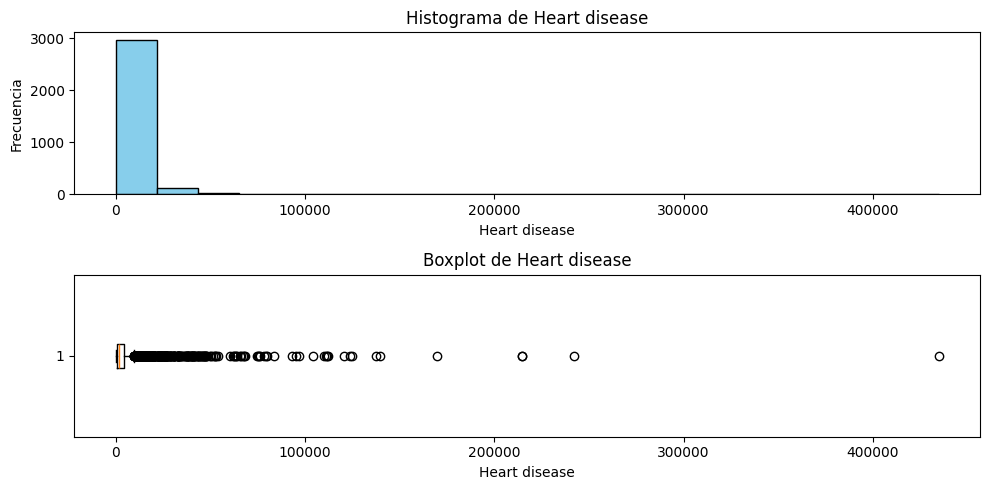

In [7]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)


fig, ax = plt.subplots(2, 1, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['Heart disease_number'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de Heart disease')
ax[0].set_xlabel('Heart disease')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['Heart disease_number'], vert=False)
ax[1].set_title('Boxplot de Heart disease')
ax[1].set_xlabel('Heart disease')

# Mostrar la figura
plt.tight_layout()
plt.show()

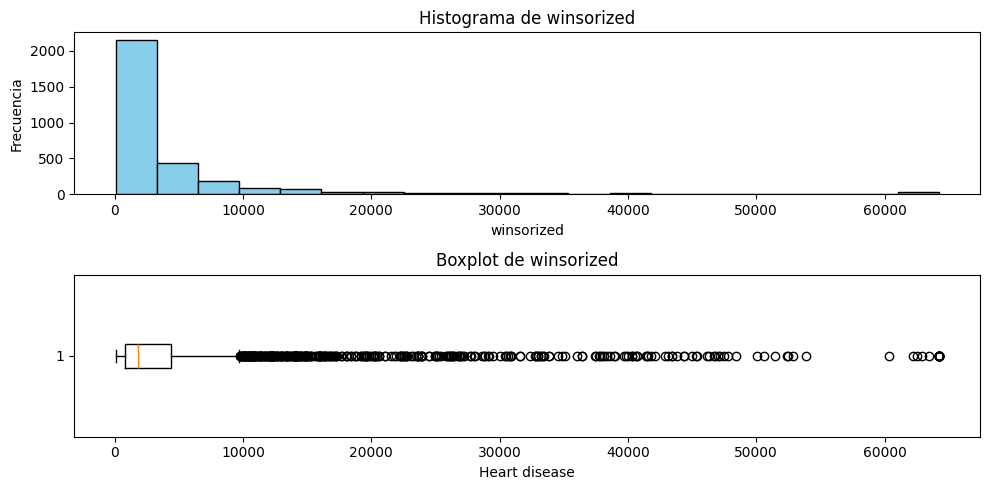

In [8]:
df['winsorized'] = mstats.winsorize(df['Heart disease_number'], limits=[0.01, 0.01])

fig, ax = plt.subplots(2, 1, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['winsorized'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de winsorized')
ax[0].set_xlabel('winsorized')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['winsorized'], vert=False)
ax[1].set_title('Boxplot de winsorized')
ax[1].set_xlabel('Heart disease')

# Mostrar la figura
plt.tight_layout()
plt.show()



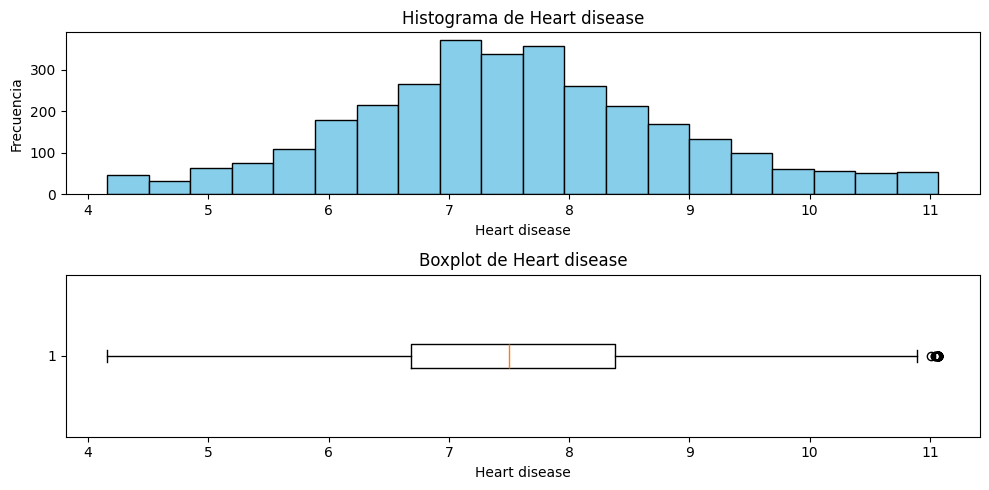

In [9]:
df['LogHeart disease_number']=np.log(df['winsorized'])
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['LogHeart disease_number'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de Heart disease')
ax[0].set_xlabel('Heart disease')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['LogHeart disease_number'], vert=False)
ax[1].set_title('Boxplot de Heart disease')
ax[1].set_xlabel('Heart disease')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [10]:
df.drop(columns=['winsorized','Heart disease_number'],axis=1,inplace=True)

In [11]:
columns_categoricas=df.select_dtypes(include=['object']).columns
columns_categoricas

df=pd.get_dummies(df,columns=columns_categoricas,drop_first=True)
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,STATE_NAME_South Dakota,STATE_NAME_Tennessee,STATE_NAME_Texas,STATE_NAME_Utah,STATE_NAME_Vermont,STATE_NAME_Virginia,STATE_NAME_Washington,STATE_NAME_West Virginia,STATE_NAME_Wisconsin,STATE_NAME_Wyoming
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,False,False,False,False,False,False,False,False,False,False
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,False,False,False,False,False,False,False,False,False,False
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,False,False,False,False,False,False,False,False,False,False
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,False,False,False,False,False,False,False,False,False,False
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,False,False,False,False,False,False,False,False,False,True
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,False,False,False,False,False,False,False,False,False,True
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,False,False,False,False,False,False,False,False,False,True
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,False,False,False,False,False,False,False,False,False,True


In [12]:
X=df.drop(columns=['LogHeart disease_number'],axis=1)
y=df['LogHeart disease_number']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [13]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [14]:
lineal_model=LinearRegression().fit(X_train_sc,y_train)
y_pred_lineal_train=lineal_model.predict(X_train_sc)
y_pred_lineal_test=lineal_model.predict(X_test_sc)



In [15]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [16]:
get_metrics(y_pred_lineal_test, y_test, y_pred_lineal_train, y_train)

,R2,Median AE,MAPE
Train set,9.698962e-01,0.043959,1.942554e+00
Test set,-3.704061e+23,0.687450,3.778971e+12
Diferencia,-3.704061e+23,0.643491,3.778971e+12


In [17]:
lineal_model.coef_

array([ 8.90604613e+07,  2.09312993e+11, -2.98435052e+11, ...,
        9.49166776e+10,  1.10113522e+11,  2.24152631e+10])

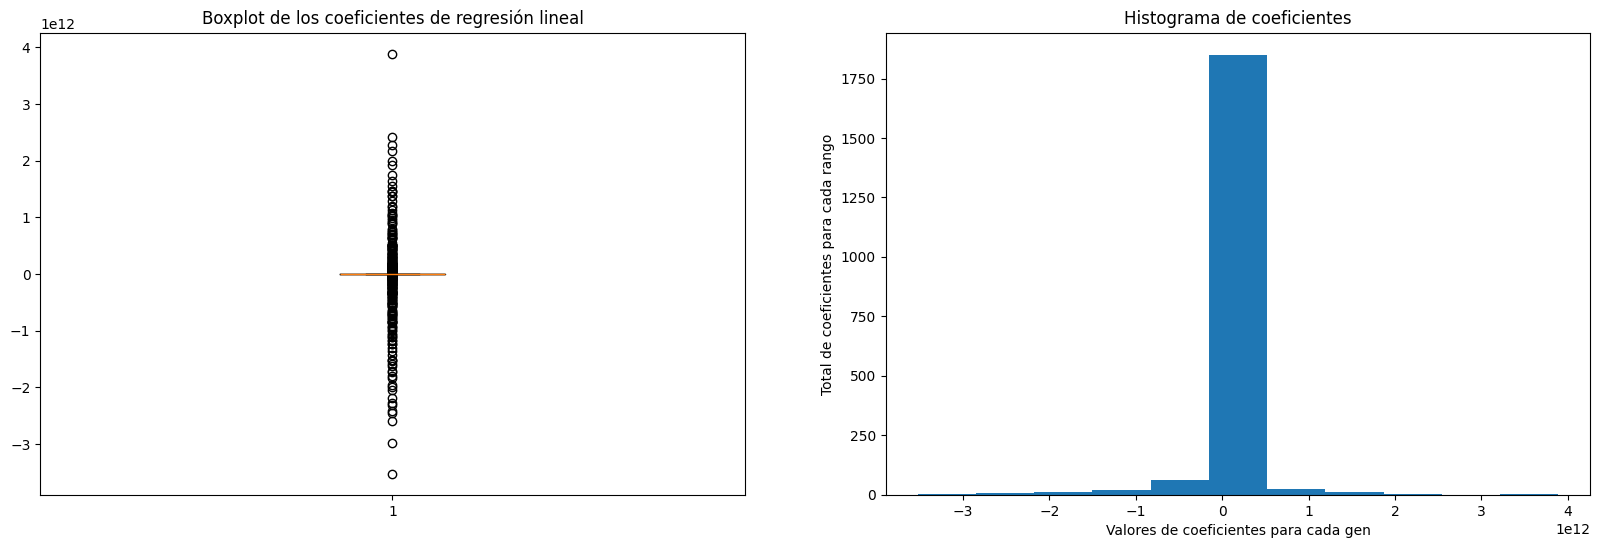

In [18]:
N = len(lineal_model.coef_)

# Aplicar la Regla de Sturges para calcular el número de bins
k = int(np.log2(N) + 1)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.boxplot(lineal_model.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(lineal_model.coef_,k)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [19]:
lasso_model= LassoCV(alphas=np.logspace(-6,6,10), cv=5, random_state=42, n_jobs=-1).fit(X_train_sc, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.91636428694038, tolerance: 0.3786087266303453
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.62166858332202, tolerance: 0.37286356370157137
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.89115174235264, tolerance: 0.3786087266303453
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_c

In [20]:
y_pred_lasso_train=lasso_model.predict(X_train_sc)
y_pred_lasso_test=lasso_model.predict(X_test_sc)

In [21]:
get_metrics(y_pred_lineal_test,y_test,y_pred_lineal_train,y_train)

,R2,Median AE,MAPE
Train set,9.698962e-01,0.043959,1.942554e+00
Test set,-3.704061e+23,0.687450,3.778971e+12
Diferencia,-3.704061e+23,0.643491,3.778971e+12


In [22]:
get_metrics(y_pred_lasso_test,y_test,y_pred_lasso_train,y_train)

,R2,Median AE,MAPE
Train set,0.895928,0.340754,5.018314
Test set,0.764732,0.371865,6.946659
Diferencia,-0.131196,0.031110,1.928345


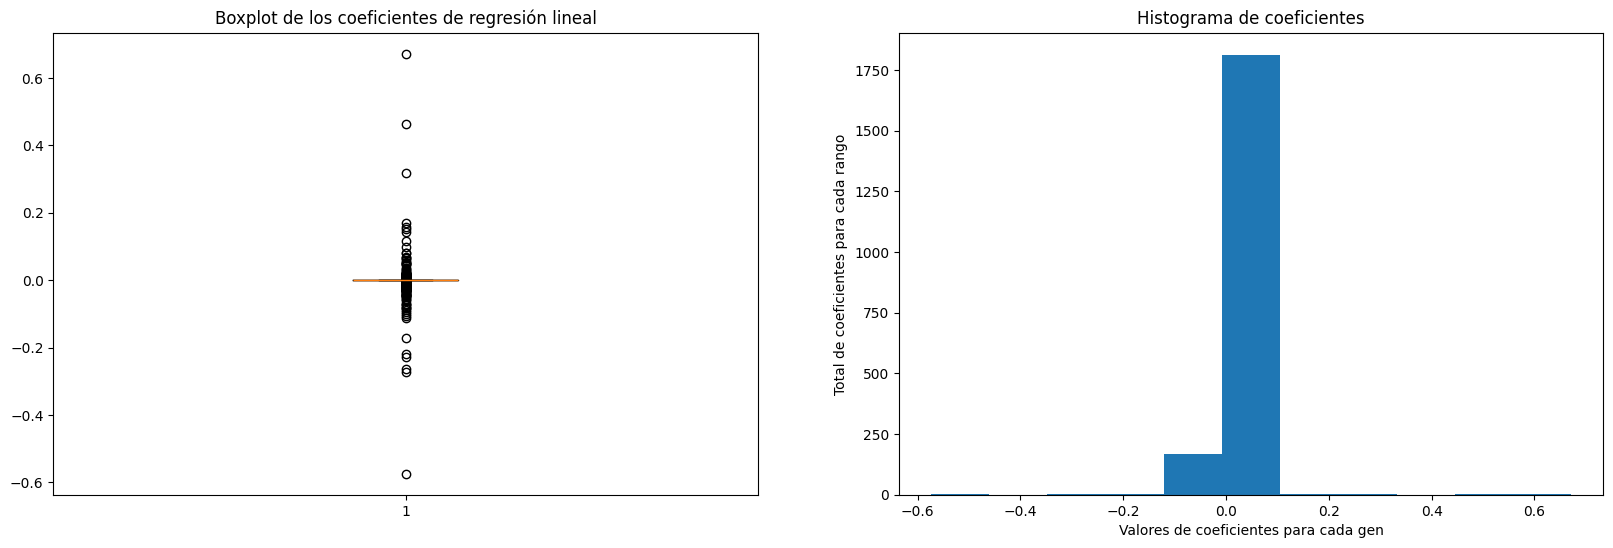

In [23]:
N = len(lasso_model.coef_)

# Aplicar la Regla de Sturges para calcular el número de bins
k = int(np.log2(N) + 1)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.boxplot(lasso_model.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(lasso_model.coef_,k)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [24]:
print(f'El porcentaje de variables canceladas es: {round(len(lasso_model.coef_[np.abs(lasso_model.coef_)==0])/len(lasso_model.coef_)*100,2)}%')
print(f'El modelo utiliza {len(lasso_model.coef_[np.abs(lasso_model.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 66.87%
El modelo utiliza 661 variables.


In [25]:
ridge_model = RidgeCV(alphas=np.logspace(-6,6,10), cv=5).fit(X_train_sc, y_train)

y_pred_ridge_train=ridge_model.predict(X_train_sc)
y_pred_ridge_test=ridge_model.predict(X_test_sc)

In [26]:
X_train_sc.shape

(2512, 1995)

In [27]:
ridge_model.coef_.shape

(1995,)

In [28]:
get_metrics(y_pred_ridge_test,y_test,y_pred_ridge_train,y_train)

,R2,Median AE,MAPE
Train set,0.945629,0.048318,2.592817
Test set,0.727599,0.423654,7.683974
Diferencia,-0.218030,0.375336,5.091157


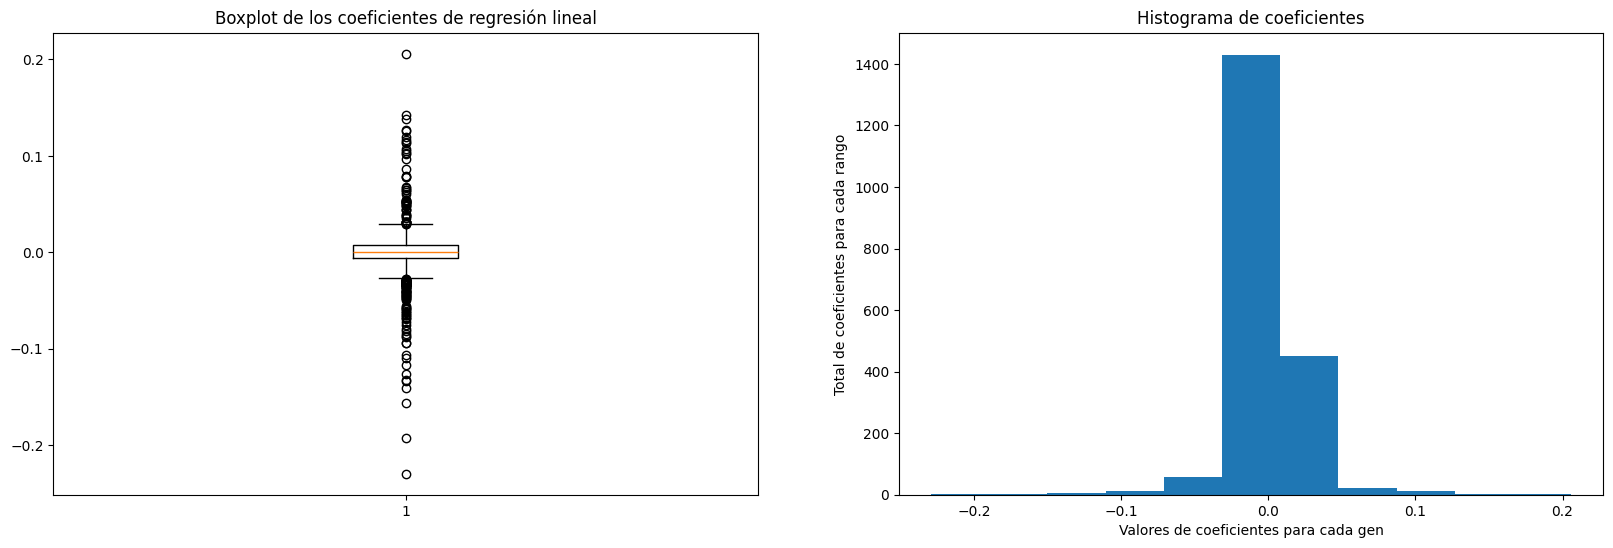

In [29]:
N = len(lasso_model.coef_)

# Aplicar la Regla de Sturges para calcular el número de bins
k = int(np.log2(N) + 1)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.boxplot(ridge_model.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(ridge_model.coef_,k)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [41]:
print(f'El porcentaje de variables canceladas es: {round(len(ridge_model.coef_[np.abs(ridge_model.coef_)==0])/len(ridge_model.coef_)*100,2)}%')
print(f'El modelo utiliza {len(ridge_model.coef_[np.abs(ridge_model.coef_)>0])} variables.')


El porcentaje de variables canceladas es: 13.68%
El modelo utiliza 1722 variables.


No entiendo por qué se estan cancelando caracteristicas. En teoría no se deberían estar cancelando

In [54]:
X_train_v1=X_train_sc[:,np.where(np.abs(lasso_model.coef_)>0)[0]]
X_test_v1=X_test_sc[:,np.where(np.abs(lasso_model.coef_)>0)[0]]

ridge_model_v1 = RidgeCV(alphas=np.logspace(-6,6,10), cv=5).fit(X_train_v1, y_train)



In [55]:
y_pred_ridge_train_v1=ridge_model_v1.predict(X_train_v1)
y_pred_ridge_test_v1=ridge_model_v1.predict(X_test_v1)

In [61]:
get_metrics(y_pred_ridge_test_v1,y_test,y_pred_ridge_train_v1,y_train)

,R2,Median AE,MAPE
Train set,0.936522,0.177250,3.286190
Test set,0.775086,0.330887,6.547321
Diferencia,-0.161436,0.153637,3.261131


In [57]:
get_metrics(y_pred_lasso_test,y_test,y_pred_lasso_train,y_train)

,R2,Median AE,MAPE
Train set,0.895928,0.340754,5.018314
Test set,0.764732,0.371865,6.946659
Diferencia,-0.131196,0.031110,1.928345


In [59]:
np.where(np.abs(lasso_model.coef_)>0)[0]

array([   0,    7,    9,   11,   13,   15,   16,   19,   22,   24,   25,
         26,   27,   29,   31,   34,   35,   36,   38,   39,   44,   46,
         48,   50,   54,   55,   59,   61,   62,   70,   77,   79,  104,
        106,  111,  115,  121,  122,  125,  127,  130,  134,  136,  139,
        142,  144,  150,  153,  154,  155,  160,  161,  162,  163,  166,
        172,  174,  181,  182,  186,  187,  190,  192,  198,  200,  207,
        211,  214,  215,  216,  219,  221,  224,  228,  229,  237,  251,
        255,  257,  264,  269,  273,  274,  277,  285,  305,  311,  313,
        314,  319,  322,  323,  324,  330,  333,  337,  338,  342,  343,
        344,  348,  353,  354,  356,  360,  361,  366,  367,  371,  373,
        376,  378,  382,  385,  387,  388,  392,  393,  398,  402,  403,
        405,  406,  413,  416,  418,  420,  421,  422,  425,  436,  437,
        439,  442,  444,  447,  448,  450,  455,  459,  460,  464,  468,
        475,  478,  480,  483,  487,  494,  500,  5